In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**Step 2: Importing dataset**

In [ ]:
df=pd.read_csv('/content/Data.csv')
pd.set_option('display.max_columns',None)
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


**Step 3: Handling the missing data**

In [ ]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 10 rows and 4 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
# filling the missing values using statistical techniques
df = df.fillna({'Age': df['Age'].mean(),
                'Salary': df['Salary'].mean()})
df.value_counts()

Country  Age        Salary        Purchased
France   35.000000  58000.000000  Yes          1
         37.000000  67000.000000  Yes          1
         44.000000  72000.000000  No           1
         48.000000  79000.000000  Yes          1
Germany  30.000000  54000.000000  No           1
         40.000000  63777.777778  Yes          1
         50.000000  83000.000000  No           1
Spain    27.000000  48000.000000  Yes          1
         38.000000  61000.000000  No           1
         38.777778  52000.000000  No           1
dtype: int64

**Step 4: Encoding categorical data**

In [ ]:
df.Country.value_counts()
# In order to avoid unnecessay Ordering of datas I'll go for One-hot-encoding here 

df_1= pd.get_dummies(df,columns=['Country'])
df_1

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,No,1,0,0
1,27.000000,48000.000000,Yes,0,0,1
2,30.000000,54000.000000,No,0,1,0
3,38.000000,61000.000000,No,0,0,1
4,40.000000,63777.777778,Yes,0,1,0
5,35.000000,58000.000000,Yes,1,0,0
6,38.777778,52000.000000,No,0,0,1
7,48.000000,79000.000000,Yes,1,0,0
8,50.000000,83000.000000,No,0,1,0
9,37.000000,67000.000000,Yes,1,0,0


In [ ]:
df_1.describe()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,38.777778,63777.777778,0.500000,0.400000,0.300000,0.300000
std,7.253777,11564.099406,0.527046,0.516398,0.483046,0.483046
min,27.000000,48000.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,55000.000000,0.000000,0.000000,0.000000,0.000000
50%,38.388889,62388.888889,0.500000,0.000000,0.000000,0.000000
75%,43.000000,70750.000000,1.000000,1.000000,0.750000,0.750000
max,50.000000,83000.000000,1.000000,1.000000,1.000000,1.000000


**Step 5: Creating a dummy variable**

In [ ]:
# Yes=1,No=0


df_1.head()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.000000,0,1,0,0
1,27.0,48000.000000,1,0,0,1
2,30.0,54000.000000,0,0,1,0
3,38.0,61000.000000,0,0,0,1
4,40.0,63777.777778,1,0,1,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
x=df_1[[i for i in df_1.columns if i != "Purchased"]].values
y=df_1["Purchased"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=45) 


**Step 7: Feature Scaling**

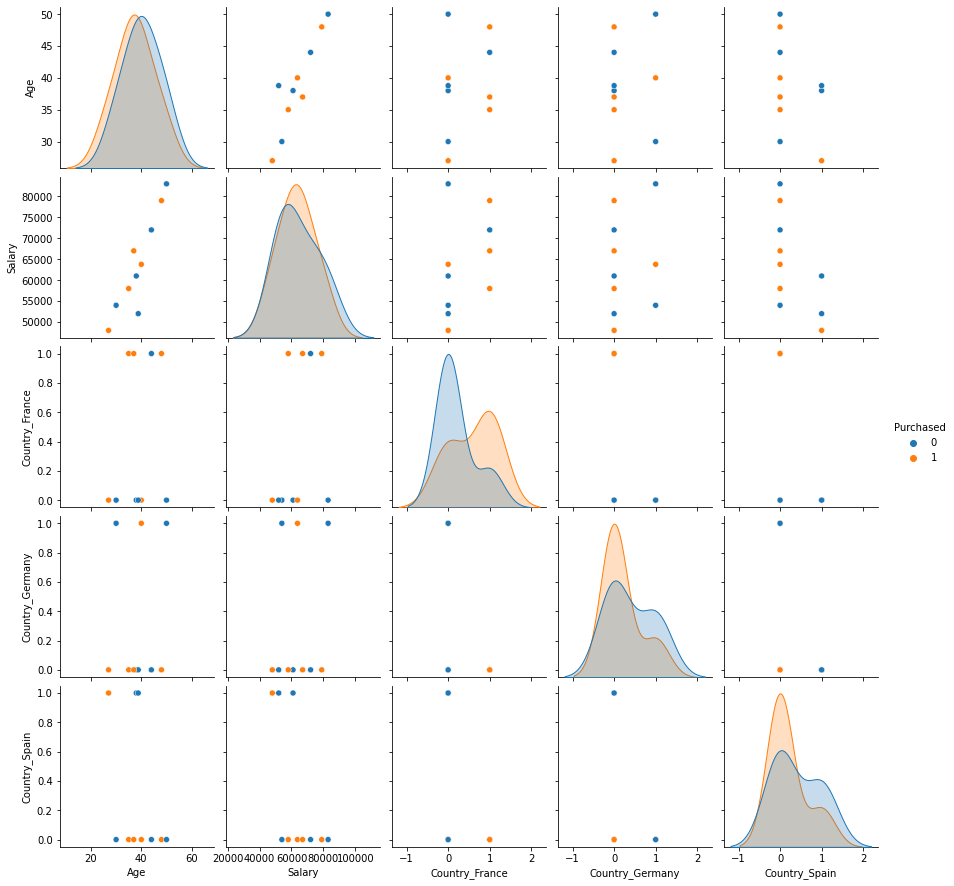

In [ ]:
sns.pairplot(df_1,hue="Purchased")
# Not linear

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_train = sc.transform(X_test)
# since the dataset contains categorical features in it i prefer to scale the columns before training choosing continuous features only

In [ ]:
X_train

array([[-2.14339604, -1.28394216, -1.15470054,  2.44948974, -0.63245553],
       [-0.28598269, -0.34906229, -1.15470054,  2.44948974, -0.63245553],
       [-2.70062005, -1.85761844, -1.15470054, -0.40824829,  1.58113883]])